In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# DATA PREPROCESSING

In [126]:
df = pd.read_csv('./HR_comma_sep.csv')

In [127]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [129]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [130]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

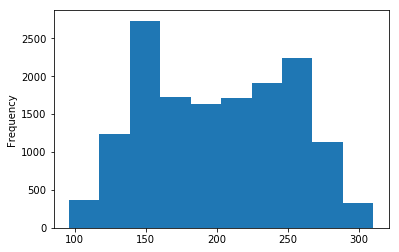

In [131]:
#average_montly_hours needs rescaling 
df['average_montly_hours'].plot(kind = 'hist')

In [132]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [133]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [134]:
X = df.drop('left',axis = 1)

In [135]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [154]:
y = df['left'].values

In [137]:
#Creating dummy columns for categorical labels sales and salary
df_dummies = pd.get_dummies(X[['sales','salary']])

In [138]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [139]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [140]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']],df_dummies],axis = 1)

In [141]:
X.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [143]:
#Avoiding dummy variable trap by dropping one column from each category
X = X.drop(['sales_sales','salary_medium'],axis = 1)

In [144]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_support,sales_technical,salary_high,salary_low
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,0,0,1


In [145]:
X = X.values

In [146]:
X


array([[ 0.38,  0.53,  2.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.8 ,  0.86,  5.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.11,  0.88,  7.  , ...,  0.  ,  0.  ,  0.  ],
       ..., 
       [ 0.37,  0.53,  2.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.11,  0.96,  6.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.37,  0.52,  2.  , ...,  0.  ,  0.  ,  1.  ]])

In [156]:
y.shape

(14999,)

In [41]:
from sklearn.model_selection import train_test_split

In [157]:
#Train/Test split with 20% test size
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [158]:
#Scaling X train/test data with MinMax scaler
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [159]:
X_train

array([[ 0.74725275,  0.21875   ,  0.2       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57142857,  0.96875   ,  0.2       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37362637,  0.25      ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       ..., 
       [ 0.0989011 ,  0.046875  ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61538462,  0.78125   ,  0.4       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01098901,  0.734375  ,  0.8       , ...,  1.        ,
         0.        ,  0.        ]])

In [160]:
X_test

array([[ 0.58241758,  0.796875  ,  0.4       , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.14285714,  0.390625  ,  0.2       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.3956044 ,  0.265625  ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.93406593,  0.875     ,  0.2       , ...,  1.        ,
         1.        ,  0.        ],
       [ 0.42857143,  0.484375  ,  0.4       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69230769,  0.875     ,  0.2       , ...,  0.        ,
         0.        ,  0.        ]])

# CLASSIFICATION
